<a href="https://colab.research.google.com/github/tharleshenriqye/Projeto-Final---Transfer-Learning-/blob/main/Projeto_Final_Transfer_Learning_Dio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
%matplotlib inline
import os
import random
import numpy as np
import keras
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from keras.applications.vgg16 import preprocess_input


In [1]:
!unzip /content/dataset_futebol.zip -d /content/dataset_futebol


Archive:  /content/dataset_futebol.zip
   creating: /content/dataset_futebol/dataset_futebol/
   creating: /content/dataset_futebol/dataset_futebol/cristiano_ronaldo/
  inflating: /content/dataset_futebol/dataset_futebol/cristiano_ronaldo/image01.jpg (2).jpg  
  inflating: /content/dataset_futebol/dataset_futebol/cristiano_ronaldo/image02.jpg.jpg  
  inflating: /content/dataset_futebol/dataset_futebol/cristiano_ronaldo/image03.jpg.jpg  
  inflating: /content/dataset_futebol/dataset_futebol/cristiano_ronaldo/image04.jpg.jpg  
  inflating: /content/dataset_futebol/dataset_futebol/cristiano_ronaldo/image05.jpg.jpg  
  inflating: /content/dataset_futebol/dataset_futebol/cristiano_ronaldo/image06.jpg.jpg  
  inflating: /content/dataset_futebol/dataset_futebol/cristiano_ronaldo/image07.jpg.jpg  
  inflating: /content/dataset_futebol/dataset_futebol/cristiano_ronaldo/image08.jpg.jpg  
  inflating: /content/dataset_futebol/dataset_futebol/cristiano_ronaldo/image09.jpg.jpg  
  inflating: /conte

In [3]:
# Verificação inicial do diretório

root = '/content/dataset_futebol/dataset_futebol'
categories = [os.path.join(root, d) for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))]
print("Categorias encontradas:", categories)


Categorias encontradas: ['/content/dataset_futebol/dataset_futebol/messi', '/content/dataset_futebol/dataset_futebol/cristiano_ronaldo']


In [4]:
# Função de carregamento de imagens com tratamento de erros
def get_image(path):
    try:
        img = image.load_img(path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        return img, x
    except Exception as e:
        print(f"Erro ao carregar {path}: {e}")
        return None, None

In [5]:
# Carregamento dos dados
data = []
for c, category in enumerate(categories):
    images = [os.path.join(category, f) for f in os.listdir(category)
              if os.path.splitext(f)[1].lower() in ['.jpg', '.png', '.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        if img is not None and x is not None:
            data.append({'x': np.array(x[0]), 'y': c})

In [6]:
# Embaralhamento e divisão dos dados
random.shuffle(data)
num_classes = len(categories)
idx_val = int(0.7 * len(data))
idx_test = int(0.85 * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]

In [7]:
# Normalização e codificação one-hot
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [34]:

for classe in os.listdir('/content/dataset_futebol/dataset_futebol'):
    classe_path = os.path.join('/content/dataset_futebol/dataset_futebol', classe)
    if os.path.isdir(classe_path):
        total = len(os.listdir(classe_path))
        print(f"Classe '{classe}': {total} imagens")


Classe 'messi': 39 imagens
Classe 'cristiano_ronaldo': 40 imagens


In [8]:
# Resumo dos dados
print(f"Imagens carregadas: {len(data)} de {num_classes} categorias")
print(f"Divisão: treino {len(x_train)}, validação {len(x_val)}, teste {len(x_test)}")

Imagens carregadas: 79 de 2 categorias
Divisão: treino 55, validação 12, teste 12


In [9]:
model = Sequential()
print("Dimensões de entrada:", x_train.shape[1:])
model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Dimensões de entrada: (224, 224, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,209,058 (4.61 MB)

 Trainable params: 1,209,058 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5165 - loss: 0.7415 - val_accuracy: 0.5833 - val_loss: 0.6815
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.5165 - loss: 0.7040 - val_accuracy: 0.5833 - val_loss: 0.6915
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.5875 - loss: 0.6909 - val_accuracy: 0.4167 - val_loss: 0.7145
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5424 - loss: 0.6547 - val_accuracy: 0.2500 - val_loss: 0.7180
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.7366 - loss: 0.6128 - val_accuracy: 0.3333 - val_loss: 0.7290
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7920 - loss: 0.5754 - val_accuracy: 0.3333 - val_loss: 0.7660
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7937 - loss: 0.4924 - val_accuracy: 0.3333 - val_loss: 0.8881
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8614 - loss: 0.4688 - val_accuracy: 0.4167 - val_loss: 0.9724
Epoch 9/10
2/2 ━

In [10]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()
inp = vgg.input
new_classification_layer = Dense(num_classes, activation='softmax')
out = new_classification_layer(vgg.layers[-2].output)
model_new = Model(inp, out)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True
model_new.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_new.summary()
history2 = model_new.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 8,194 (32.01 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 51s 26s/step - accuracy: 0.4714 - loss: 1.0287 - val_accuracy: 0.5833 - val_loss: 0.6518
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 43s 21s/step - accuracy: 0.5286 - loss: 0.7938 - val_accuracy: 0.4167 - val_loss: 1.4750
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 85s 24s/step - accuracy: 0.4835 - loss: 1.2470 - val_accuracy: 0.5833 - val_loss: 0.6594
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 79s 23s/step - accuracy: 0.6638 - loss: 0.6927 - val_accuracy: 0.5833 - val_loss: 0.8149
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 84s 24s/step - accuracy: 0.5165 - loss: 0.9804 - val_accuracy: 0.5833 - val_loss: 0.6311
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 82s 24s/step - accuracy: 0.3570 - loss: 0.8334 - val_accuracy: 0.4167 - val_loss: 0.8233
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 81s 25s/step - accuracy: 0.4939 - loss: 0.7537 - val_accuracy: 0.4167 - val_loss: 0.7603
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 45s 25s/step - accuracy: 0.5754 - loss: 0.6515 - val_accuracy: 0.6667 - val_loss: 0.5914


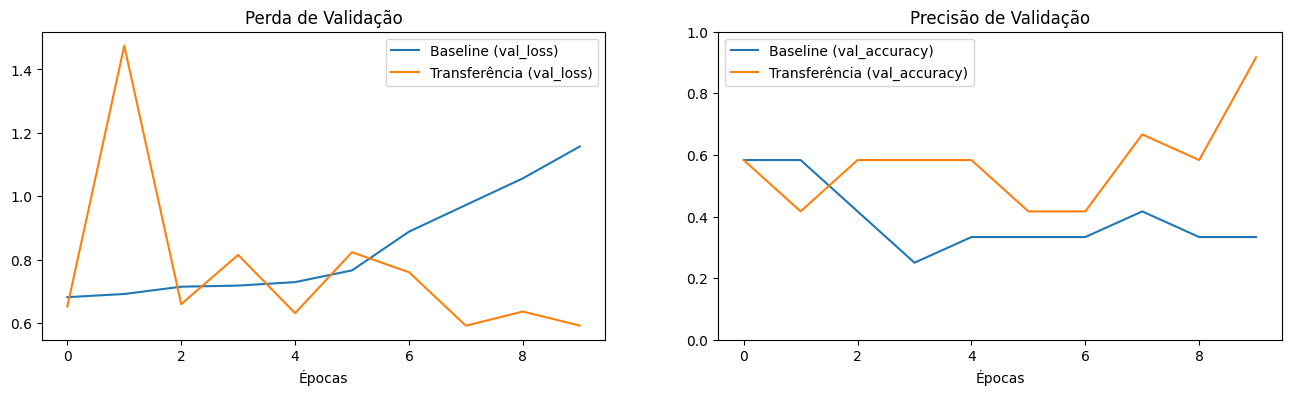

Perda no teste (Baseline): 0.9558141827583313
Precisão no teste (Baseline): 0.5833333134651184
Perda no teste (Transferência): 0.7327637076377869
Precisão no teste (Transferência): 0.5


In [29]:
import matplotlib.pyplot as plt

# Criar figura e subplots
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"], label='Baseline (val_loss)')
ax.plot(history2.history["val_loss"], label='Transferência (val_loss)')
ax.set_title("Perda de Validação")
ax.set_xlabel("Épocas")
ax.legend()

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"], label='Baseline (val_accuracy)')
ax2.plot(history2.history["val_accuracy"], label='Transferência (val_accuracy)')
ax2.set_title("Precisão de Validação")
ax2.set_xlabel("Épocas")
ax2.set_ylim(0, 1)
ax2.legend()

plt.show()

# Avaliar e exibir métricas nos conjuntos de teste
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Perda no teste (Baseline):', loss)
print('Precisão no teste (Baseline):', accuracy)
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)
print('Perda no teste (Transferência):', loss)
print('Precisão no teste (Transferência):', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Acurácia: 0.50
Precisão: 0.53
Recall: 0.50
F1-Score: 0.50


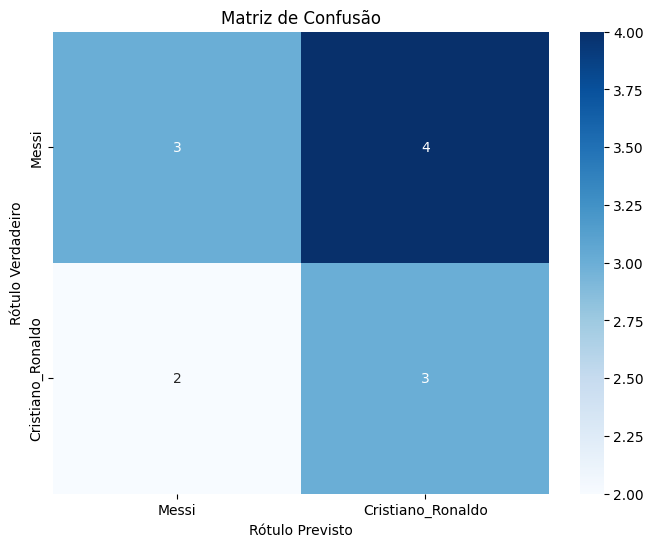

In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Fazer previsões no conjunto de teste
y_pred = model_new.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Calcular métricas
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Exibir métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Messi', 'Cristiano_Ronaldo'], yticklabels=['Messi', 'Cristiano_Ronaldo'])
plt.title('Matriz de Confusão')
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')
plt.show()

In [31]:
# Caminho da nova imagem
nova_imagem_path = '/content/image100.jpg'

# Carregar e pré-processar a imagem
img = image.load_img(nova_imagem_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Fazer a previsão
previsao = model_new.predict(x)

# Interpretar o resultado (para 2 classes: Messi e Cristiano_Ronaldo)
classes = ['Messi', 'Cristiano_Ronaldo']
classe_prevista = classes[np.argmax(previsao)]
confianca = np.max(previsao) * 100

print(f"Classe prevista: {classe_prevista}")
print(f"Confiança: {confianca:.2f}%")
print('Acertou')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Classe prevista: Messi
Confiança: 77.66%
Acertou


In [32]:
# Caminho da nova imagem
nova_imagem_path = '/content/image101.jpg'

# Carregar e pré-processar a imagem
img = image.load_img(nova_imagem_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Fazer a previsão
previsao = model_new.predict(x)

# Interpretar o resultado (para 2 classes: Messi e Cristiano_Ronaldo)
classes = ['Messi', 'Cristiano_Ronaldo']
classe_prevista = classes[np.argmax(previsao)]
confianca = np.max(previsao) * 100

print(f"Classe prevista: {classe_prevista}")
print(f"Confiança: {confianca:.2f}%")
print('Errou')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step
Classe prevista: Messi
Confiança: 80.17%
Errou
